In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Importing data from CSV file
insurance_data = pd.read_csv("insurance-data.csv")
insurance_data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


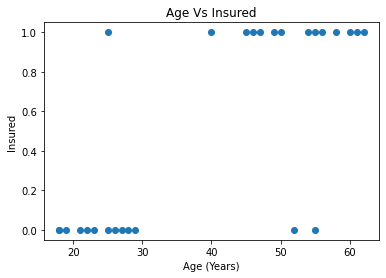

In [9]:
# Data Visualization
plt.scatter(insurance_data['age'],insurance_data['bought_insurance'])
plt.title("Age Vs Insured")
plt.xlabel("Age (Years)")
plt.ylabel("Insured")
plt.show()

In [31]:
# Splitting Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(insurance_data[['age']],insurance_data['bought_insurance'],test_size=0.1)

In [32]:
# Data Test
X_train

,age
10,18
8,62
26,23
17,58
1,25
19,18
12,27
5,56
16,25
20,21


In [33]:
X_test

,age
24,50
6,55
7,60


In [34]:
y_train

10    0
8     1
26    0
17    1
1     0
19    0
12    0
5     1
16    1
20    0
18    0
21    0
0     0
15    1
23    1
13    0
4     1
14    1
22    1
9     1
11    0
2     1
25    1
3     0
Name: bought_insurance, dtype: int64

In [35]:
y_test

24    1
6     0
7     1
Name: bought_insurance, dtype: int64

In [36]:
# Creating Logistic Regression Object
from sklearn.linear_model import LogisticRegression
ins_model = LogisticRegression()

In [37]:
# Training Model
ins_model.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Testing Model
insured_predicted = ins_model.predict(X_test)
insured_predicted

array([1, 1, 1], dtype=int64)

In [39]:
# Model Score : Training Data
print("Model Score : {:.4f}".format(ins_model.score(X_train,y_train)))

Model Score : 0.9167


In [40]:
# Model Score : Testing Data
print("Model Score : {:.4f}".format(ins_model.score(X_test,y_test)))

Model Score : 0.6667


In [42]:
# Results
result = pd.concat([X_test,y_test],axis="columns")
result["predicted_bought_insurance"] = insured_predicted
result

,age,bought_insurance,predicted_bought_insurance
24,50,1,1
6,55,0,1
7,60,1,1


In [46]:
# Exporting results to CSV file
result.to_csv("results.csv",index=False)

In [45]:
# Saving Model to Binary File
import joblib
joblib.dump(ins_model,"ins-model")

['ins-model']